**Course**: Data Visualization (Prof. Dr. Heike Leitte, Luisa Vollmer, RPTU Kaiserslautern),   **Name**: Eduardo Miranda,   **Date**: 08.01.2024

<div class="alert alert-info">

    
# Assignment 3 - Exploratory data analysis of the Titanic dataset
</div>

> The RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after it collided with an iceberg during its maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard the ship, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history. The RMS Titanic was the largest ship afloat at the time it entered service and was the second of three Olympic-class ocean liners operated by the White Star Line. The Titanic was built by the Harland and Wolff shipyard in Belfast. Thomas Andrews, her architect, died in the disaster.

![](NYT_titanic.png)

source: [wikipedia.org](https://en.wikipedia.org/wiki/RMS_Titanic)


### Outline and goals

In the third assignment, we will explore the titanic dataset using exploratory data analysis. The goals of this exercise are:
- conduct exploratory data analysis using python's seaborn library
- make a structured analysis (of a subset) of a given dataset
- contrast subgroups of data
- find patterns and outliers in data

<div class="alert alert-danger">

**Important**: While no points will be awarded for typing the correct answers in the notebooks, it is highly advised to solve the tasks thoroughly. They are designed to be encouraging and provide you with valuable learnings for the exam, understanding of the methods and practical coding.
</div>

<div class="alert alert-success">
    
All tasks in this notebook are marked in green.
</div>

<div class="alert alert-info">
    
## 1. Load the data
</div>

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Description of the titanic dataset:
survived - Survival (0 = No; 1 = Yes)<br>
plass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)<br>
sex - Gender<br>
age - Age<br>
sibsp - Number of Siblings/Spouses Aboard<br>
parch - Number of Parents/Children Aboard<br>
fare - Passenger fare<br>
embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)<br>
class - Class as string<br>
who - Type of person (child, man, woman)<br>
adult_male - Passenger is an adult male<br>
deck - Deck of passenger's accomodation<br>
embark_town - Port of Embarkation as string<br>
alive - Boolean<br>
alone - Person travelled alone<br>

<div class="alert alert-info">
    
## 2. Get an overview
</div>

The command [`pandas.DataFrame.dtypes`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html) returns the data types as inferred by pandas. 

<div class="alert alert-success">
    
Check if the inferred types match with the ones you would have assigned to each column.
</div>

In [62]:
titanic.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

The command [`pandas.DataFrame.describe`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) provides summary statistics for all attributes.

In [63]:
titanic.describe(include="all")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div class="alert alert-warning">
No, some of them are wrong, as an example we have the "age".
</div>

<div class="alert alert-success">

    
Which columns contain missing values, commonly NaN? Hint: Consider the 'count' row of `describe`.
</div>

<div class="alert alert-warning">
Age, embarked, class, adult_male...
</div>

<div class="alert alert-success">

What are the names of the different decks and how many people were assigned to each deck? Does every passenger have an assigned deck?
</div>

Hint: The method [`pandas.Series.value_counts`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) may be helpful.

In [64]:
titanic.value_counts("deck")

deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
dtype: int64

<div class="alert alert-info">
    
## 3. Analyze variables individually
</div>

First we look into some of the variables individually. We will not cover the entire dataset in detail which would exceed the scope of an assignment, but concentrate on some aspects of it.

**Hints**:
- [documentation of countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot)
- [list of seaborn plots](https://seaborn.pydata.org/api.html#relational-api)
- [Seaborn cheat sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf)

**Examples**: 

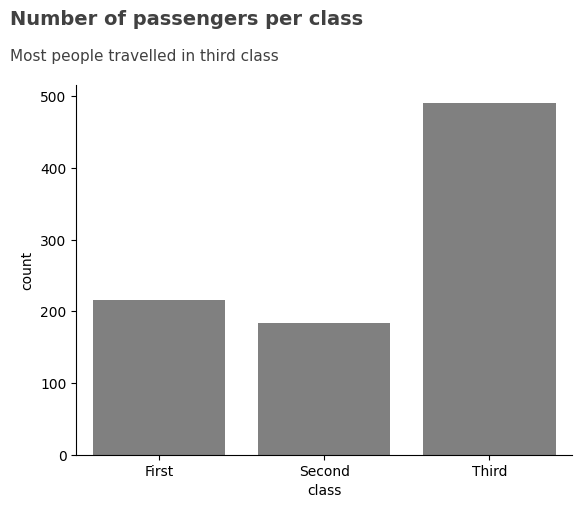

In [65]:
ax = sns.countplot(x="class", data=titanic, color="gray")
ax.text(x=-.9, y=600, s="Number of passengers per class", fontsize=14, fontweight='semibold', color='#414141')
ax.text(x=-.9, y=550, s="Most people travelled in third class", fontsize=11, fontweight='normal', color='#414141')
sns.despine()

<div class="alert alert-success">
    
Finish the histogram below. 
- Set an appropriate number of bins and add a subtitle that tells about one finding. 
- Can you detect different price groups?
</div>

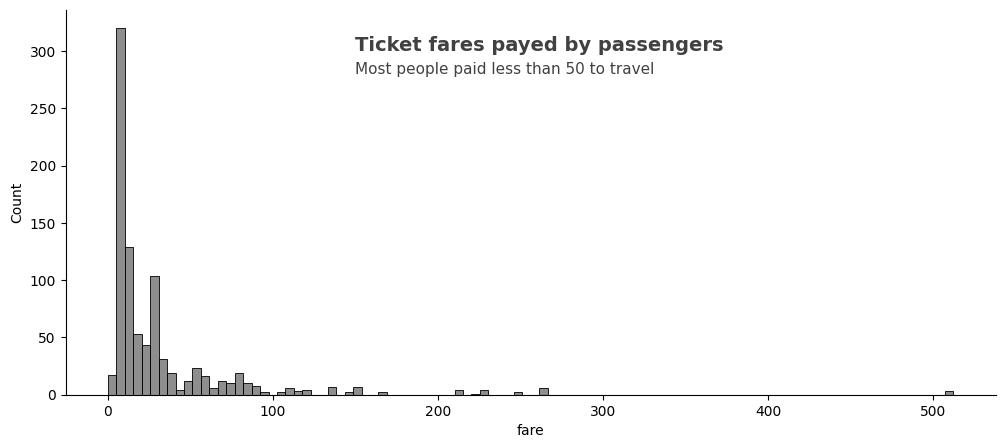

In [66]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.histplot(data=titanic["fare"], color="dimgray", bins=100)
ax.text(x=150, y=300, s="Ticket fares payed by passengers", fontsize=14, fontweight='semibold', color='#414141')
ax.text(x=150, y=280, s="Most people paid less than 50 to travel", fontsize=11, fontweight='normal', color='#414141')
sns.despine()

<div class="alert alert-success">
    
Select two columns/variables from the dataset and plot each with an appropriate chart (= two 1D-histograms, explore more if you want). Check that chart parameters are set appropriately. Add a matching title to your charts and state one finding in the subtitle.
</div>

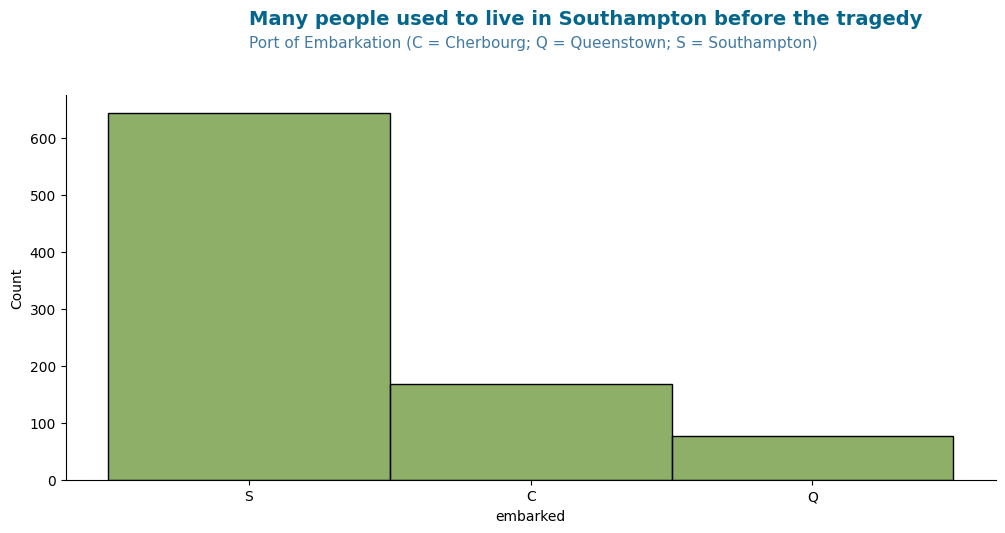

In [67]:
list(titanic)

fig, ax = plt.subplots(figsize=(12,5))
ax = sns.histplot(data=titanic["embarked"], color="#679436", bins=5)
ax.text(x=0, y=800, s="Many people used to live in Southampton before the tragedy", fontsize=14, fontweight='semibold', color='#05668D')
ax.text(x=0, y=760, s="Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)", fontsize=11, fontweight='normal', color='#427AA1')
sns.despine()


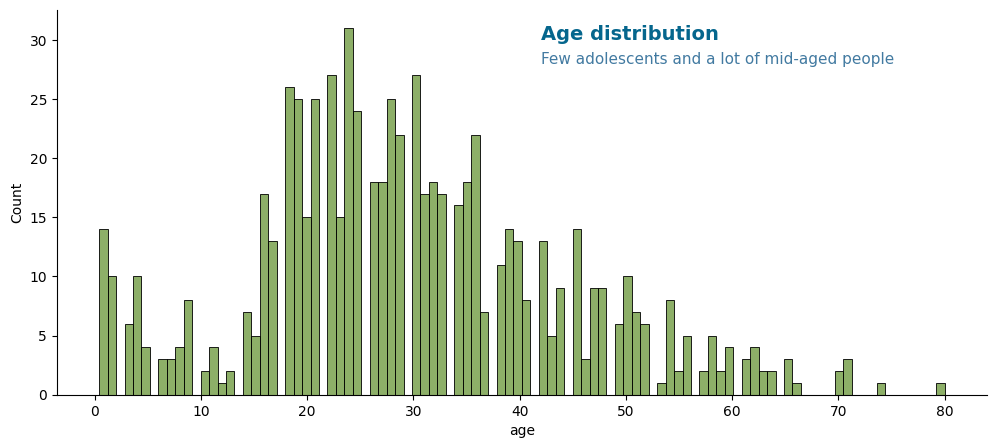

In [68]:

fig, ax = plt.subplots(figsize=(12,5))
ax = sns.histplot(data=titanic["age"], color="#679436", bins=100)
ax.text(x=42, y=30, s="Age distribution", fontsize=14, fontweight='semibold', color='#05668D')
ax.text(x=42, y=28, s="Few adolescents and a lot of mid-aged people", fontsize=11, fontweight='normal', color='#427AA1')
sns.despine()


<div class="alert alert-info">
    
## 4. Who did survive?
</div>

For each question below, create a chart in the axes above that helps you answer the questions. It is ok to stick to the [plots implemented in seaborn](https://seaborn.pydata.org/api.html). Some plots, like stacked bar charts, require more work.

<div class="alert alert-success">
    
Who had the highest chance of survival: men, women, or children? Hint: You can add another dimension to you `displot` or `countplot` by coloring bars with 'hue=column_name'.
</div>

/tmp/ipykernel_59214/2063086224.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['category'] = filtered_data.apply(lambda row: 'Child' if row['age'] < 18 else row['sex'], axis=1)


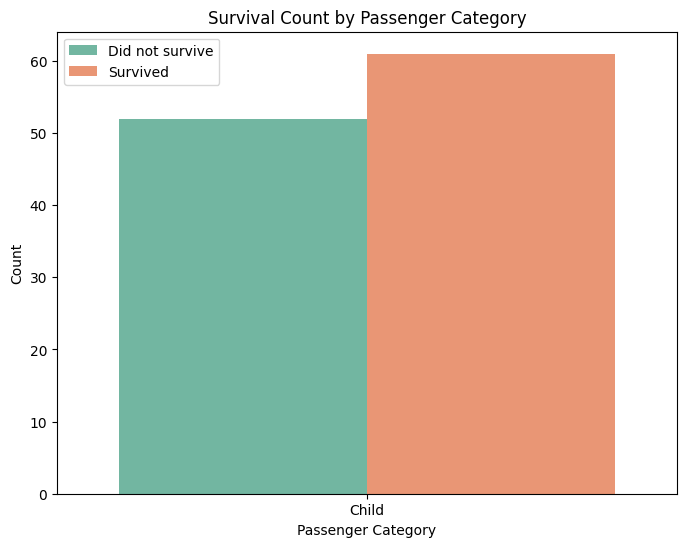

In [69]:
# Filter the data for only 'Man', 'Woman', and 'Child'
filtered_data = titanic[titanic['age'] < 18]  # Considering age < 18 as 'Child'
filtered_data['category'] = filtered_data.apply(lambda row: 'Child' if row['age'] < 18 else row['sex'], axis=1)

# Create a countplot to show survival rates based on gender (Man, Woman, Child)
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=filtered_data, x='category', hue='survived', palette='Set2')

# Adding labels and title
plt.xlabel('Passenger Category')
plt.ylabel('Count')
plt.title('Survival Count by Passenger Category')

# Modifying legend labels
handles, labels = ax.get_legend_handles_labels()
labels = ['Did not survive', 'Survived']
ax.legend(handles, labels)

plt.show()

<div class="alert alert-success">
    
Did age have an influence? Compare the age of people who survived and those who did not. Is your observation consistent for all three types of people (men, women, children)?
</div>

**Did people on all decks have the same survival rate?**

The probabilities of survival and death can be computed as follows. We count the total number of people in each group ([`pandas.Series.value_counts`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)) and divide by the total number of passengers:

In [70]:
titanic['alive'].value_counts() / len(titanic)

no     0.616162
yes    0.383838
Name: alive, dtype: float64

We see that the total survival rate was 38%.

To do the same for each deck, we first to handle NaN-values in the deck entries. We add a new column, that has a categorical entry "None" for all passengers with an unspecified deck entry:

In [71]:
titanic['deck_all'] = titanic['deck'].cat.add_categories("None").fillna("None")

<div class="alert alert-success">
    
Now compute the survival rates per deck and plot the resulting series using, for example, [`seaborn.barplot`](https://seaborn.pydata.org/generated/seaborn.barplot.html).

</div>

Hints:
- Pandas allows you to filter data. `titanic[ titanic['age'] > 10 ]` returns a series of all passengers that are older than 10 years. This can be used to filter only people that survived.
- You can divide a series by a series elementwise. `titanic['fare'] / titanic['age']` computes for each passanger the fraction fare divided by age (i.e. ticket price per year they lived - which is nonesense, but computable).

<div class="alert alert-info">
    
## 4. Fake news?
</div>

You talk to a friend about the titanic dataset and he/she says: 
> It's so unfair. Only elderly people could afford First Class tickets and have a good trip on the Titanic.

<div class="alert alert-success">
    
Briefly discuss this statement. Write approximately 10-15 lines.
</div>

Hint:
- Explanation of **Discuss**: Essentially this is a written debate where you are using your skill at reasoning, backed up by carefully selected evidence to make a case for and against an argument, or point out the advantages and disadvantages of a given context. Remember to arrive at a conclusion. source (not necessary to read): [Essay terms explained by University of Leicester](https://www2.le.ac.uk/projects/oer/oers/ssds/oers/writing-skills/writingskillscg.pdf)


In [72]:
# suggestions: countplot, displot, histplot, scatterplot, boxplot, jointplot
